# LightGBM

### import

In [1]:
from lightgbm import LGBMClassifier
from lightgbm import plot_importance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 유틸리티 함수(7week에서 했던 것)
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print("오차행렬\n", confusion)
    print("정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}\n".format(accuracy, precision, recall, f1, roc_auc))

### load dataset

In [3]:
vote_df2 = pd.read_csv('../vote_df2.csv')
vote_df2

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,religion_Hindu,religion_Jewish,religion_Muslim,religion_Other,religion_Sikh,urban_1,urban_2,urban_3,engnat_1,engnat_2
0,1.0,0.000124,5.0,0.000322,5.0,0.000383,1.0,0.000440,1.0,0.000400,...,0,0,0,0,0,0,1,0,1,0
1,1.0,0.000211,5.0,0.000473,5.0,0.002294,1.0,0.000690,1.0,0.001705,...,1,0,0,0,0,0,0,1,0,1
2,5.0,0.000242,1.0,0.000224,2.0,0.000687,1.0,0.001164,3.0,0.000809,...,0,0,0,0,0,0,1,0,1,0
3,4.0,0.000065,1.0,0.000911,1.0,0.002214,4.0,0.002965,1.0,0.000724,...,1,0,0,0,0,1,0,0,0,1
4,4.0,0.000217,5.0,0.000512,5.0,0.000523,3.0,0.000366,1.0,0.000657,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36420,1.0,0.000119,5.0,0.000291,5.0,0.000544,1.0,0.000748,1.0,0.000230,...,0,0,0,1,0,0,1,0,1,0
36421,3.0,0.000186,4.0,0.000312,5.0,0.000662,2.0,0.000436,1.0,0.000423,...,0,1,0,0,0,1,0,0,0,1
36422,2.0,0.000245,4.0,0.000383,2.0,0.000785,1.0,0.000668,2.0,0.000951,...,0,0,0,0,0,0,1,0,1,0
36423,5.0,0.000111,1.0,0.000297,1.0,0.000550,3.0,0.000378,5.0,0.000294,...,0,0,0,1,0,0,0,1,1,0


In [5]:
X = vote_df2.drop(['voted'], axis=1)
y = vote_df2['voted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### LightGBM 성능평가(params = default)

In [29]:
# TODO: LightGBM
lgbm_wrapper = LGBMClassifier(random_state=0, application='binary')
evals = [(X_test, y_test)]

# LGBMClassifier 학습/예측/평가
lgbm_wrapper.fit(X_train, y_train)
lgbm_acc_train = accuracy_score(y_train, lgbm_wrapper.predict(X_train))
lgbm_acc_test = accuracy_score(y_test, lgbm_wrapper.predict(X_test))
print('LGBMClassifier Train 정확도:{0:.4f}'.format(lgbm_acc_train))
print('LGBMClassifier Test 정확도:{0:.4f}'.format(lgbm_acc_test))

preds = lgbm_wrapper.predict(X_test)
pred_probs = lgbm_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_probs)

LGBMClassifier Train 정확도:0.7698
LGBMClassifier Test 정확도:0.6910
오차행렬
 [[2526 1472]
 [ 779 2508]]
정확도: 0.6910, 정밀도: 0.6302, 재현율: 0.7630, F1:0.6902, AUC:0.7659



### LightGBM feature_importances_ 뽑아서 성능평가(params = default)
30으로 결정

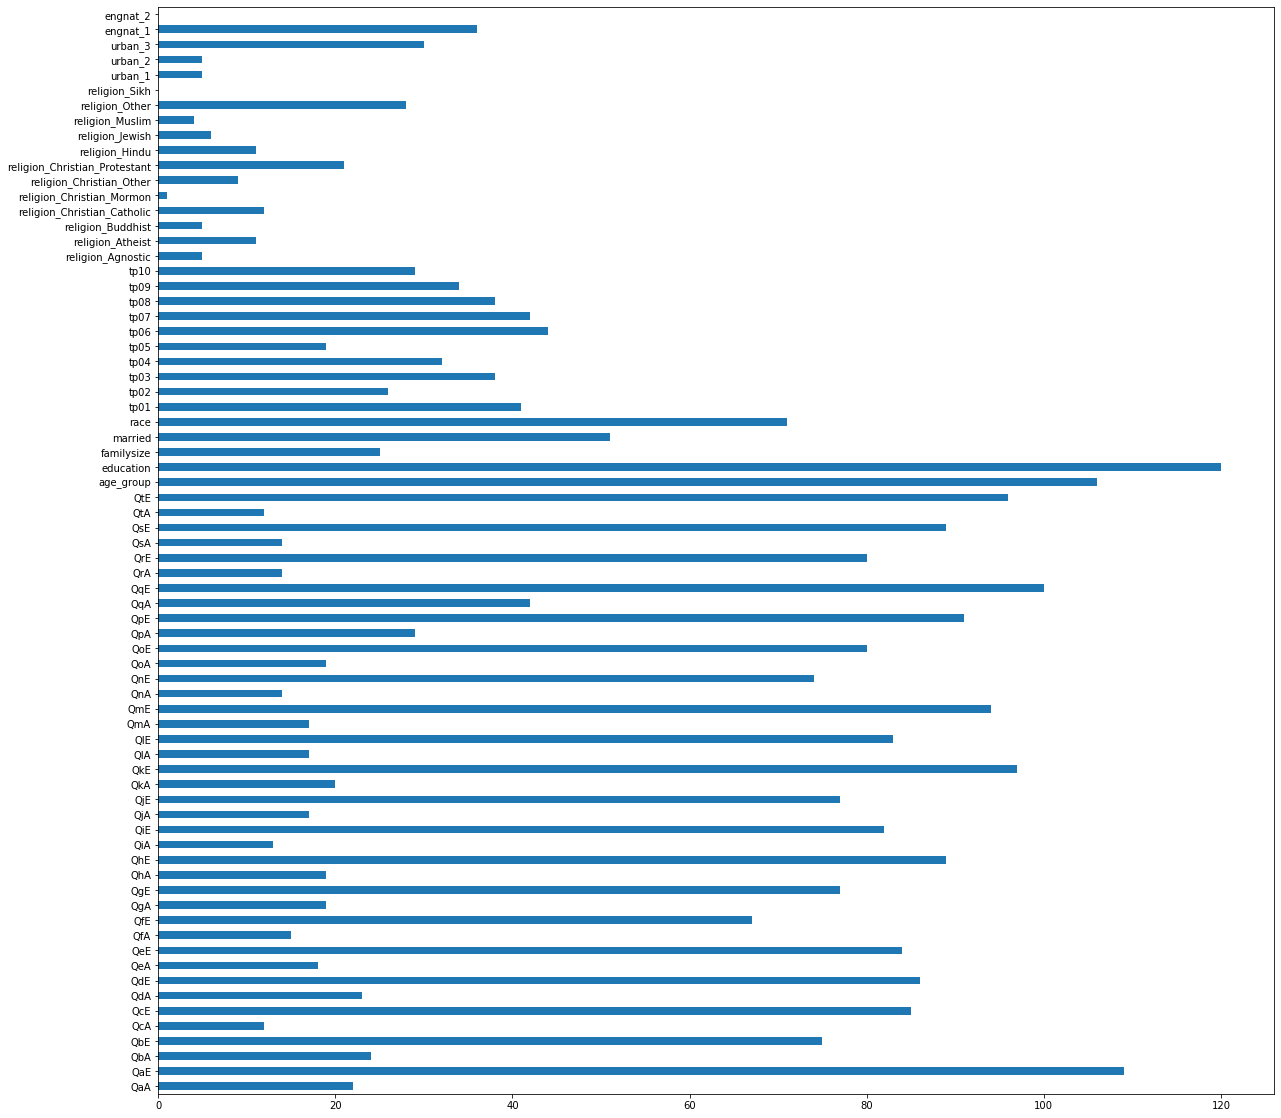

중요도 뽑아내기: [ 22 109  24  75  12  85  23  86  18  84  15  67  19  77  19  89  13  82
  17  77  20  97  17  83  17  94  14  74  19  80  29  91  42 100  14  80
  14  89  12  96 106 120  25  51  71  41  26  38  32  19  44  42  38  34
  29   5  11   5  12   1   9  21  11   6   4  28   0   5   5  30  36   0]
중요도 평균: 41.666666666666664
중요도 중앙값: 28.5


In [34]:
feat_imp = pd.Series(lgbm_wrapper.feature_importances_, index=X_train.columns)
feat_imp.plot(kind='barh', figsize=(20,20))

plt.show()
print("중요도 뽑아내기:", lgbm_wrapper.feature_importances_)
print("중요도 평균:", np.mean(lgbm_wrapper.feature_importances_))
print("중요도 중앙값:", np.median(lgbm_wrapper.feature_importances_))

In [60]:
importances = [30, 35, 40, 45, 50, 55, 70, 75, 80, 85]

# feature importance별로 
for importance in importances:
    selected = (lgbm_wrapper.feature_importances_ > importance)
    index_for_selection = np.array(range(len(selected)))
    selected_column_index = index_for_selection[selected]

    # 선택된 컬럼만 활용
    X_train_selected = pd.DataFrame(X_train).iloc[:, selected_column_index]
    X_test_selected = pd.DataFrame(X_test).iloc[:, selected_column_index]

    print(importance,"일때 컬럼들:", X_train_selected.columns)
    
    # 선택된 데이터로
    lgbm_wrapper_selected = LGBMClassifier(random_state=0)

    evals = [(X_test_selected, y_test)]
    lgbm_wrapper_selected.fit(X_train_selected, y_train)

    lgbm_acc_train_selected = accuracy_score(y_train, lgbm_wrapper_selected.predict(X_train_selected))
    lgbm_acc_test_selected = accuracy_score(y_test, lgbm_wrapper_selected.predict(X_test_selected))
    print('LGBMClassifier Train 정확도:{0:.4f}'.format(lgbm_acc_train_selected))
    print('LGBMClassifier Test 정확도:{0:.4f}'.format(lgbm_acc_test_selected))

    preds_selected = lgbm_wrapper_selected.predict(X_test_selected)
    pred_probs_selected = lgbm_wrapper_selected.predict_proba(X_test_selected)[:, 1]
    get_clf_eval(y_test, preds_selected, pred_probs_selected)
    print("###############################   다음   ###############################")

30 일때 컬럼들: Index(['QaE', 'QbE', 'QcE', 'QdE', 'QeE', 'QfE', 'QgE', 'QhE', 'QiE', 'QjE',
       'QkE', 'QlE', 'QmE', 'QnE', 'QoE', 'QpE', 'QqA', 'QqE', 'QrE', 'QsE',
       'QtE', 'age_group', 'education', 'married', 'race', 'tp01', 'tp03',
       'tp04', 'tp06', 'tp07', 'tp08', 'tp09', 'engnat_1'],
      dtype='object')
LGBMClassifier Train 정확도:0.7575
LGBMClassifier Test 정확도:0.6950
오차행렬
 [[2577 1421]
 [ 801 2486]]
정확도: 0.6950, 정밀도: 0.6363, 재현율: 0.7563, F1:0.6911, AUC:0.7639

###############################   다음   ###############################
35 일때 컬럼들: Index(['QaE', 'QbE', 'QcE', 'QdE', 'QeE', 'QfE', 'QgE', 'QhE', 'QiE', 'QjE',
       'QkE', 'QlE', 'QmE', 'QnE', 'QoE', 'QpE', 'QqA', 'QqE', 'QrE', 'QsE',
       'QtE', 'age_group', 'education', 'married', 'race', 'tp01', 'tp03',
       'tp06', 'tp07', 'tp08', 'engnat_1'],
      dtype='object')
LGBMClassifier Train 정확도:0.7594
LGBMClassifier Test 정확도:0.6910
오차행렬
 [[2559 1439]
 [ 812 2475]]
정확도: 0.6910, 정밀도: 0.6323, 재현율: 0.7530, F1:0.687

#### 중요도는 30초과일때 가장 성능이 좋음
정확도 기준: 30  
정밀도 기준: 30  
재현율 기준: 55  
F1 기준: 30  
AUC 기준: 30  
모든 컬럼을 넣었을때: 정확도: 0.6910, 정밀도: 0.6302, 재현율: 0.7630, F1:0.6902, AUC:0.7659

### 피쳐중요도 최소30으로 지정 후, GridSearch

### cross validation(best parameter)
하이퍼파라미터별로 모델을 만들고, cross-validation을 통해 검증  
https://m.blog.naver.com/PostView.naver?blogId=gustn3964&logNo=221431933811&proxyReferer=https:%2F%2Fwww.google.com%2F 를 참고하여 다시작성!!!!!!